In [2]:
print("ASE notebook")

ASE notebook


In [3]:
%notebook inline

In [4]:

from ase.build import molecule
from ase.geometry.analysis import Analysis
from ase.io import read, write

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
orig_mpl_backend = plt.get_backend()
# matplotlib.use('pgf')
# plt.rcParams.update({
#     "font.family": "serif",  # use serif/main font for text elements
#     "text.usetex": True,     # use inline math for ticks
#     "pgf.rcfonts": False,    # don't setup fonts from rc parameters
#     "pgf.preamble": "\n".join([
#          r"\usepackage{unicode-math}",   # unicode math setup
#     ])
# })

Text(0, 0.5, 'Angle (degrees)')

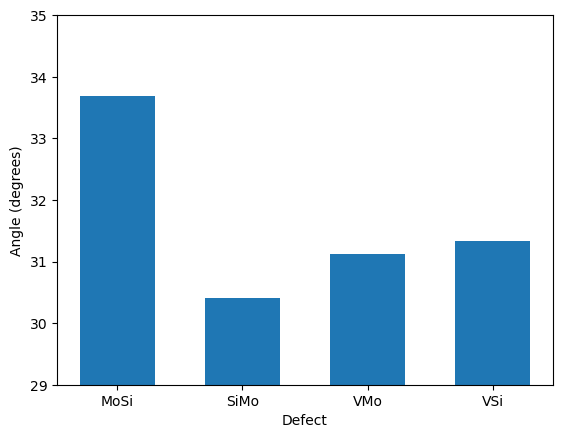

In [31]:
defects = ['MoSi', 'SiMo', 'VMo', 'VSi']
angles = [33.6810, 30.4045, 31.1147, 31.3315]

fig, ax = plt.subplots()
ax.bar(defects, angles, width=0.6)
ax.set(ylim=(29, 35))
ax.set_xlabel('Defect')
ax.set_ylabel('Angle (degrees)')

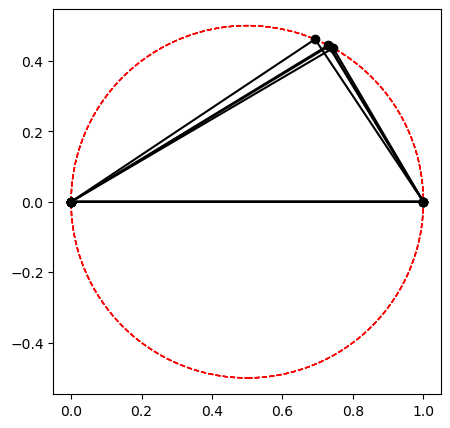

In [62]:
angles = [33.6810, 30.4045, 31.1147, 31.3315]

fig, ax = plt.subplots(figsize=(5, 5), sharey=True)

def plot_angle(angle):
    angle_b = math.radians(angle)  # the interior 25 degree angle of our right triangle
    angle_a = math.radians(0)  # 30 degree angle between the plotted angle_b triangle and the x axis.
    point_A = (0, 0)
    point_B = (math.cos(angle_a + angle_b) * math.cos(angle_b), math.sin(angle_a + angle_b) * math.cos(angle_b))
    point_C = (math.cos(angle_a), math.sin(angle_a)) * 100
    
    point_M = ((point_A[0] + point_C[0]) / 2, (point_A[1] + point_C[1]) / 2)

    # Draw the right triangle between our points.
    ax.plot(*zip(point_A, point_B, point_C, point_A), marker='o', color='black')
    # draw a circle around the 3 points
    ax.add_patch(plt.Circle(point_M, math.sqrt((point_M[0] - point_A[0]) ** 2 + (point_M[1] - point_A[1]) ** 2),
                            ec='r', ls='--', fc='none'))
    ax.set_aspect('equal', 'datalim')

for angle in angles:
    plot_angle(angle)
    

In [70]:
def f(m):
    mol = read(m)
    ana = Analysis(mol)
    
    MSBonds = ana.get_bonds('Mo', 'Si', unique=True)
    MSBondValues = ana.get_values(MSBonds)
    print(sorted(MSBondValues[0], reverse=False)[:min(2, len(MSBondValues[0]))][0])
    print(sorted(MSBondValues[0], reverse=True)[:min(2, len(MSBondValues[0]))][0])
    
    SMSAngles = ana.get_angles('Si', 'Mo', 'Si', unique=True)
    MSMAngles = ana.get_angles('Mo', 'Si', 'Mo', unique=True)
    SMSAngles = ana.get_angles('Si', 'Mo', 'Si', unique=True)
    print(f"There are {len(MSBonds[0])} Mo-Si bonds in {m}.")
    print(f"There are {len(MSMAngles[0])} Si-Mo-Si angles in {m}.")
    print(f"There are {len(SMSAngles[0])} Mo-Si-Mo angles in {m}.")
    
    MSMAngleValues = ana.get_values(MSMAngles)
    SMSAngleValues = ana.get_values(SMSAngles)
    print("The average Mo-Si bond length is {}.".format(np.average(MSBondValues)))
    print("The average Mo-Si-Mo angle is {}.".format(np.average(MSMAngleValues)))
    print("The average Si-Mo-Si angle is {}.".format(np.average(SMSAngleValues)))

In [71]:
f('Mo3Si2/CONTCAR')

2.527149447674506
2.583837169568993
There are 20 Mo-Si bonds in Mo3Si2/CONTCAR.
There are 40 Si-Mo-Si angles in Mo3Si2/CONTCAR.
There are 24 Mo-Si-Mo angles in Mo3Si2/CONTCAR.
The average Mo-Si bond length is 2.565183303531114.
The average Mo-Si-Mo angle is 101.62501010038292.
The average Si-Mo-Si angle is 110.03293942638193.


In [72]:
f('Mo3Si2-defect-data/MoSi/CONTCAR')

2.4713831013822998
3.0203054431172864
There are 507 Mo-Si bonds in Mo3Si2-defect-data/MoSi/CONTCAR.
There are 1788 Si-Mo-Si angles in Mo3Si2-defect-data/MoSi/CONTCAR.
There are 1119 Mo-Si-Mo angles in Mo3Si2-defect-data/MoSi/CONTCAR.
The average Mo-Si bond length is 2.561940116145447.
The average Mo-Si-Mo angle is 99.78506963257735.
The average Si-Mo-Si angle is 105.59615676816085.


In [73]:
f('Mo3Si2-defect-data/SiMo/CONTCAR')

2.4603724721476348
2.830573726108845
There are 511 Mo-Si bonds in Mo3Si2-defect-data/SiMo/CONTCAR.
There are 1760 Si-Mo-Si angles in Mo3Si2-defect-data/SiMo/CONTCAR.
There are 1159 Mo-Si-Mo angles in Mo3Si2-defect-data/SiMo/CONTCAR.
The average Mo-Si bond length is 2.5635721997455305.
The average Mo-Si-Mo angle is 99.8917180541537.
The average Si-Mo-Si angle is 105.2159174064274.


In [74]:
f('Mo3Si2-defect-data/VMo/CONTCAR')

2.490718341670391
2.7230431789162726
There are 506 Mo-Si bonds in Mo3Si2-defect-data/VMo/CONTCAR.
There are 1750 Si-Mo-Si angles in Mo3Si2-defect-data/VMo/CONTCAR.
There are 1137 Mo-Si-Mo angles in Mo3Si2-defect-data/VMo/CONTCAR.
The average Mo-Si bond length is 2.563755719419874.
The average Mo-Si-Mo angle is 99.74047471370119.
The average Si-Mo-Si angle is 105.48130956027123.


In [75]:
f('Mo3Si2-defect-data/VSi/CONTCAR')

2.4602160228094885
2.631947428081024
There are 504 Mo-Si bonds in Mo3Si2-defect-data/VSi/CONTCAR.
There are 1764 Si-Mo-Si angles in Mo3Si2-defect-data/VSi/CONTCAR.
There are 1116 Mo-Si-Mo angles in Mo3Si2-defect-data/VSi/CONTCAR.
The average Mo-Si bond length is 2.5622698386685836.
The average Mo-Si-Mo angle is 99.85257832179997.
The average Si-Mo-Si angle is 105.506235782601.


In [67]:
f('MoSi2_tetragonal/CONTCAR')

[2.6198256693192206, 2.6198256693192206]
There are 2 Mo-Si bonds in MoSi2_tetragonal/CONTCAR.
There are 0 Si-Mo-Si angles in MoSi2_tetragonal/CONTCAR.
There are 1 Mo-Si-Mo angles in MoSi2_tetragonal/CONTCAR.


IndexError: list index out of range

In [76]:
f('MoSi2_hexagonal/CONTCAR')

2.5805119710876046
2.6535845258140287
There are 18 Mo-Si bonds in MoSi2_hexagonal/CONTCAR.
There are 18 Si-Mo-Si angles in MoSi2_hexagonal/CONTCAR.
There are 45 Mo-Si-Mo angles in MoSi2_hexagonal/CONTCAR.
The average Mo-Si bond length is 2.6048716472411018.
The average Mo-Si-Mo angle is 115.18110440885101.
The average Si-Mo-Si angle is 105.2352681328478.
